Hey! My name is Alan! I'm going to review your project!

You can see my comments in colored markdown cells, so please don't delete them. Each color means the following:

<div class="alert alert-block alert-success">
<b>Success:</b> Everything is done succesfully.
</div>
<div class="alert alert-block alert-warning">
<b>Can be improved:</b> If i can give some recommendations. If your work have more than 3 of these, it can't be accepted.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> If the block requires some corrections. Work can't be accepted with red comments.
</div>

<div class="alert alert-info"> 
    
<b>Student's comment:</b> Can be placed like this as an example.</div>



<div class="alert alert-danger">

**Conclusion:** Thank you so much for submitting your project!  I like the way you've done analysis and reasoning in your project. There are few things that need to be corrected in your project. They're mostly minor issues that are easy to fix. One more time and you'll have it!
* Add axis labels to graphs
* Make column names lowercase
</div>

<div class="alert alert-success">

**Conclusion v2:** Now your project is a true "A". Congratulations! I'm glad to say that your project has been accepted.
Keep up the good work, and good luck on the next sprint!
</div>

# Integrated Project:  Video game store

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify
import matplotlib.cbook as cbook
from scipy import stats as st


Defaulting to user installation because normal site-packages is not writeable


In [2]:
df = pd.read_csv("/datasets/games.csv")

## Search for problems with the data set

### Studying of the general information

In [3]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div class="alert alert-warning">

**Reviewer's comment:** You can you `display()` instead of `print()` to display tables in a more readable format.
</div>

In [4]:
print(df.tail())

                                Name Platform  Year_of_Release       Genre  \
16710  Samurai Warriors: Sanada Maru      PS3           2016.0      Action   
16711               LMA Manager 2007     X360           2006.0      Sports   
16712        Haitaka no Psychedelica      PSV           2016.0   Adventure   
16713               Spirits & Spells      GBA           2003.0    Platform   
16714            Winning Post 8 2016      PSV           2016.0  Simulation   

       NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score  \
16710      0.00      0.00      0.01          0.0           NaN        NaN   
16711      0.00      0.01      0.00          0.0           NaN        NaN   
16712      0.00      0.00      0.01          0.0           NaN        NaN   
16713      0.01      0.00      0.00          0.0           NaN        NaN   
16714      0.00      0.00      0.01          0.0           NaN        NaN   

      Rating  
16710    NaN  
16711    NaN  
16712    NaN  
16713   

In [5]:
print(df.sample())

                       Name Platform  Year_of_Release   Genre  NA_sales  \
14929  Kawasaki Snowmobiles      Wii           2008.0  Racing      0.02   

       EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
14929       0.0       0.0          0.0           NaN          2      E  


In [6]:
df.describe(include=["object"])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


The dataset contains the information about the sales figures of video games across various platforms in the regions of North America, Europe and Japan.
When using methods that provide information about the general information about the data, it is already noticeable that some values are missing in several columns. This will be examined in more detail in point 1.4. 

### Search for wrong values

In the following, incorrect values are to be found for all columns of the data set. For the numeric columns histograms are plotted to make extreme values visually recognizable and for the categorical columns the value_counts() metohde is used to display the occurring values.

Text(0.5, 1.0, 'Game releases per year')

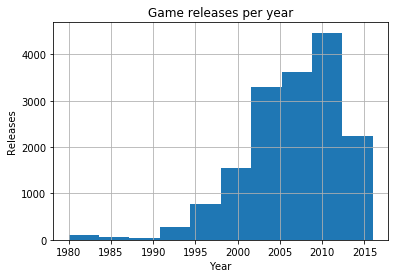

In [7]:
pl = df["year_of_release"].hist()
pl.set_xlabel("Year")
pl.set_ylabel("Releases")
pl.set_title('Game releases per year')

<div class="alert alert-danger">

**Reviewer's comment:** You did it right, but graphs should have axis text labels (not column names).
</div>

In [8]:
print(df[df["year_of_release"]<1985])

                       Name Platform  Year_of_Release     Genre  NA_sales  \
9                 Duck Hunt      NES           1984.0   Shooter     26.93   
89                  Pac-Man     2600           1982.0    Puzzle      7.28   
240                Pitfall!     2600           1981.0  Platform      4.21   
262               Asteroids     2600           1980.0   Shooter      4.00   
281              Excitebike      NES           1984.0    Racing      2.04   
...                     ...      ...              ...       ...       ...   
8457             Death Trap     2600           1982.0    Action      0.15   
8458           Armor Ambush     2600           1981.0    Action      0.15   
8739        Pressure Cooker     2600           1982.0    Action      0.14   
9095                  Krull     2600           1982.0    Action      0.13   
9487  RealSports Volleyball     2600           1981.0    Sports      0.12   

      EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
9  

In [9]:
print(df["platform"].value_counts())

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


In [10]:
print(df["genre"].value_counts())

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


0.2696978761591385


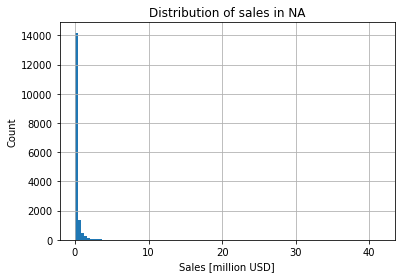

In [11]:
pl = df["na_sales"].hist(bins=100)
print(len(df[df["na_sales"]==0])/len(df))

pl.set_xlabel("Sales [million USD]")
pl.set_ylabel("Count")
pl.set_title('Distribution of sales in NA')
plt.show()

0.3511815734370326


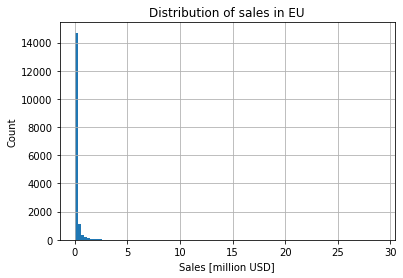

In [12]:
pl = df["eu_sales"].hist(bins=100)
print(len(df[df["eu_sales"]==0])/len(df))

pl.set_xlabel("Sales [million USD]")
pl.set_ylabel("Count")
pl.set_title('Distribution of sales in EU')
plt.show()

0.6290158540233324


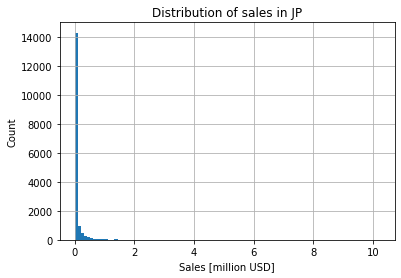

In [13]:
pl = df["jp_sales"].hist(bins=100)
print(len(df[df["jp_sales"]==0])/len(df))


pl.set_xlabel("Sales [million USD]")
pl.set_ylabel("Count")
pl.set_title('Distribution of sales in JP')
plt.show()

0.3949147472330242


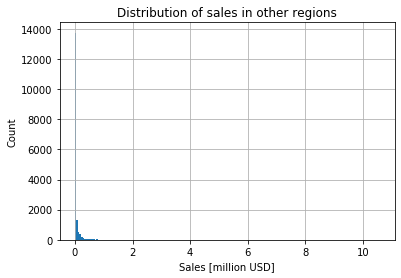

In [14]:
pl = df["other_sales"].hist(bins=200)
print(len(df[df["other_sales"]==0])/len(df))


pl.set_xlabel("Sales [million USD]")
pl.set_ylabel("Count")
pl.set_title('Distribution of sales in other regions')
plt.show()

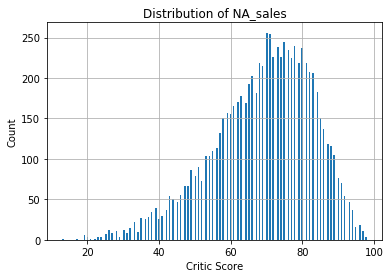

In [15]:
pl = df["critic_score"].hist(bins=200)


pl.set_xlabel("Critic Score")
pl.set_ylabel("Count")
pl.set_title('Distribution of na_sales')
plt.show()

In [16]:
df["user_score"].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
9.6       2
2.3       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [17]:
df["rating"].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

When plotting histograms for the numeric variables and using the value_counts() method for the categorical variables, I noticed that the string "tbd" appears in the "user_score" column. This will cause us problems later when we change the data type for this column. Therefore these values will be removed in point 2.1.

### Search for wrong data types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are wrong data types in the folowing columns:
    
    - year_of_release: float --> int
    - user_score: string --> float

### Search for missing values

In [19]:
# Function to count missing values for each columns in a DataFrame
def missing_data(data):
    # Count number of missing value in a column
    total = data.isnull().sum()           
    
    # Get Percentage of missing values
    percent = (data.isnull().sum()/data.isnull().count()*100)   
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent(%)'])

    # Create a Type column, that indicates the data-type of the column.
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    temp['Types'] = types

    return(np.transpose(temp))


In [20]:
missing_data(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
Total,2,0,269,2,0,0,0,0,8578,6701,6766
Percent(%),0.0119653,0,1.60933,0.0119653,0,0,0,0,51.3192,40.0897,40.4786
Types,object,object,float64,object,float64,float64,float64,float64,float64,object,object


There are missing values in the folowing columns:
    
    - name: 0.01% of the values are missing
    - year_of_release: 1.61% of the values are missing
    - genre: 1.2% of the values are missing
    - critic_score: 51.32% of the values are missing
    - user_score: 40.09% of the values are missing
    - rating: 40.48% of the values are missing

In [21]:
print(df[df["name"].isna()])

      Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


In the few columns where the name is missing, many other values are also gone. Since there are only 2 rows with this problem, they will get deleted.

In [22]:
print(df[df["year_of_release"].isna()].head(10))

                                            Name Platform  Year_of_Release  \
183                              Madden NFL 2004      PS2              NaN   
377                             FIFA Soccer 2004      PS2              NaN   
456                   LEGO Batman: The Videogame      Wii              NaN   
475                   wwe Smackdown vs. Raw 2006      PS2              NaN   
609                               Space Invaders     2600              NaN   
627                                    Rock Band     X360              NaN   
657     Frogger's Adventures: Temple of the Frog      GBA              NaN   
678  LEGO Indiana Jones: The Original Adventures      Wii              NaN   
719                               Call of Duty 3      Wii              NaN   
805                                    Rock Band      Wii              NaN   

         Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
183     Sports      4.26      0.26      0.01         0.71         

The missing values in the "year_of_release"- column will be replaced by the median of the column. The games without year_of_release- value may have been caused by errors in data entry.

In [23]:
print(df[df["genre"].isna()].head())

      Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


The rows with missing values in the "genre" column are the same rows where the "name" values are missing. As already mentioned, they will be deleted. These 2 games without names may have been caused by errors in data entry.

In [24]:
print(df[df["critic_score"].isna()].head())

                        Name Platform  Year_of_Release         Genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN  


In [25]:
av_a = df.loc[~df["critic_score"].isna()]["na_sales"].mean()
av_b = df.loc[df["critic_score"].isna()]["na_sales"].mean()


print("average sales in North America for all games without missing critic_score- value: {:.2} USD million".format(av_a))
print("average sales in North America for all games with missing critic_score value: {:.2} USD million".format(av_b))


Average sales in North America for all games without missing Critic_score- value: 0.35 USD million
Average sales in North America for all games with missing Critic_score value: 0.18 USD million


As we can see in the cell above, there is a big difference in the average sales of games with and without a critic_score value. So one possible cause could be that professional critic scores were only done for games with high sales. It's just a guess and should be excluded in more detail, but it's beyond the scope of this project.

In [26]:
print(df[df["user_score"].isna()].head())

                        Name Platform  Year_of_Release         Genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN  


In [27]:
test = df[(~df["user_score"].isna())&(df["user_score"]!="tbd")]

test = test[~test["critic_score"].isna()]

In [28]:
test["user_score"] = pd.to_numeric(test["user_score"])

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7017 entries, 0 to 16705
Data columns (total 11 columns):
Name               7017 non-null object
Platform           7017 non-null object
Year_of_Release    6894 non-null float64
Genre              7017 non-null object
NA_sales           7017 non-null float64
EU_sales           7017 non-null float64
JP_sales           7017 non-null float64
Other_sales        7017 non-null float64
Critic_Score       7017 non-null float64
User_Score         7017 non-null float64
Rating             6947 non-null object
dtypes: float64(7), object(4)
memory usage: 657.8+ KB


In [30]:
test['critic_score'].corr(test['user_score'])

0.5808778320767236

There is a moderate correlation between the "user_score" column and the "critic_score" column (0.58). Since these 2 columns are related, I will create a function that calculates a missing "user_score" value with the value of the "critic_score" column and vice versa.
Since there are many game titles, where the critic and user rating miss completely (~50%), i won't replace them because it would change the results too much. Only the columns where just one values of the 2 rating columns is missing, will be edited.

In [31]:
df.loc[df["user_score"].isna()]["year_of_release"].value_counts().sort_index()

1980.0      9
1981.0     46
1982.0     36
1983.0     17
1984.0     14
1985.0     13
1986.0     21
1987.0     16
1988.0     14
1989.0     17
1990.0     16
1991.0     41
1992.0     42
1993.0     62
1994.0    120
1995.0    219
1996.0    255
1997.0    270
1998.0    348
1999.0    299
2000.0    200
2001.0    143
2002.0    173
2003.0    164
2004.0    166
2005.0    235
2006.0    330
2007.0    376
2008.0    440
2009.0    407
2010.0    457
2011.0    418
2012.0    290
2013.0    225
2014.0    231
2015.0    271
2016.0    206
Name: Year_of_Release, dtype: int64

As we can see in the column above, there are missing values in the user_score column for all games, regardless of their release year. This means that the main cause of the missing data is not the fact that the rating has yet to be done. So the scores must have been lost in some other way.

In [32]:
print(df[df["rating"].isna()].head())

                        Name Platform  Year_of_Release         Genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN  


The missing values in the "rating"- column will be raplaced with "unknown".

### Search for duplicates

In [33]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []


There are no duplicates in the data set. So no further preprocessing is necessary at this point.

### Conclusion

The main problem with the dataset is the many missing values. In the user_score column there are almost 50% missing. For the questions where the user_score column plays a role, the results will be extremely inaccurate. A second problem are the "tbd"- values in the user_score- column. They are treated the same as the missing values and a function is created that calculates the user_score from the critic_score column.
Also some data types must be changed, for example the year_of_release- column.

<div class="alert alert-success">

**Reviewer's comment:** Good analysis 👍
</div>

## Data preprocessing

### Lowercasing the column names

In [34]:
df.columns = map(str.lower, df.columns)

### Change wrong values

In [41]:
def fill_tbd(data):
    data_new = data
    user_score_new = []
    for index, row in data_new.iterrows():
        
        if (row["user_score"] == "tbd"):
            user_score_new.append(row["critic_score"]/10)
        else:
            user_score_new.append(pd.to_numeric(row["user_score"]))
    
    data_new["user_score"] = user_score_new
    
    return data_new   

The method in the cell above, uses the critic_score value, divides it by 10 and replaces the "tbd" values with the calculated result.

In [42]:
df = fill_tbd(df)

### Change wrong data types

#### year_of_release

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         8672 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [45]:
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'].median()).astype(int)

#### user_score

In [46]:
df["user_score"] = df["user_score"].astype(float)

### Replace the missing values

#### name

In [48]:
df = df[~df["name"].isna()]

#### year_of_release

In [49]:
df.loc[df["year_of_release"].isna(), "year_of_release"] = df["year_of_release"].median()
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         8672 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### critic_score and user_score

In [50]:
print(df["user_score"].mean())

6.9935539667896665


In [51]:
def calculate_rating(data):
    data_new = data
    user_score_new = []
    critic_score_new = []

    for index, row in data_new.iterrows():        
        if ((pd.isnull(row["user_score"]))&(pd.isnull(row["critic_score"]))):
            
            critic_score_new.append(row["critic_score"])
            user_score_new.append(row["user_score"])
          
            
        elif pd.isnull(row["critic_score"]):

            
            critic_score_new.append(row["user_score"]*10)
            user_score_new.append(row["user_score"])

        elif pd.isnull(row["user_score"]):
            critic_score_new.append(row["critic_score"])
            user_score_new.append(row["critic_score"]/10)
        else:
            critic_score_new.append(row["critic_score"])
            user_score_new.append(row["user_score"])
            
    data_new["user_score"] = user_score_new
    data_new["critic_score"] = critic_score_new

    
    return data_new        

In [52]:
df = calculate_rating(df)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
missing_data(df)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
Total,0,0,0,0,0,0,0,0,8003,8003,6764
Percent(%),0,0,0,0,0,0,0,0,47.8849,47.8849,40.4715
Types,object,object,int64,object,float64,float64,float64,float64,float64,float64,object


#### rating

In [57]:
df["rating"] = df["rating"].fillna("unknown")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Conclusion

Many missing values have now been replaced. The rows with missing name values have been removed, the rows with missing year_of_release values have been replaced by the median and the rows with missing critic_score or user_score values have been processed with a function that converts user_score to critic_score and vice versa. In many cases, both values (user_score and critic_score) were missing. In this caseses, substitution was not performed because it would change the result too much, since these are almost 50% of all rows.
Also the wrong data types of the year_of_release and user_score columns were changed. In the user_score column, the "tbd" strings had to be removed first before the data type was changed to float, which is why the preprocessing steps are done in this order.

<div class="alert alert-danger">

**Reviewer's comment:** Interesting approach to filling missing values. I want to kindly remind you that we need to make column names lowercase at this step.
</div>

## The sum of sales in all regions for each game

In [58]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"] 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

In this step a new column "total_sales" was created. It's the sum of all regions together.

## Analyze the data

### Number of games released for each year

In [60]:
dfp = df[["year_of_release", "name"]].groupby(["year_of_release"]).count().sort_values(by="year_of_release").reset_index()

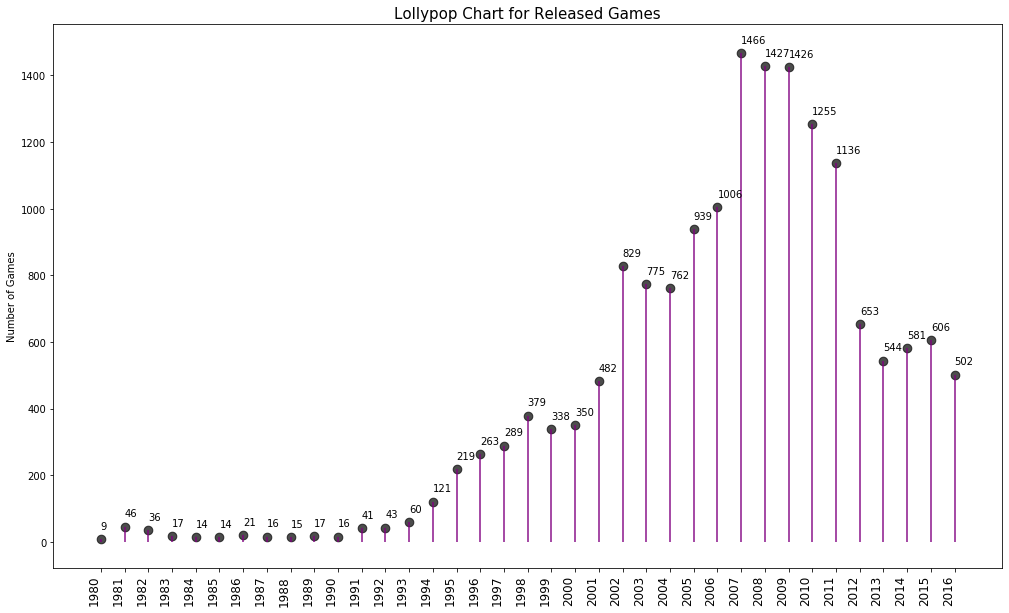

In [61]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=dfp.year_of_release, ymin=0, ymax=dfp.name, color="purple", alpha=0.7, linewidth=2)
ax.scatter(x=dfp.year_of_release, y=dfp.name, s = 75, color="black", alpha = 0.7)

ax.set_title("Lollypop Chart for Released Games", fontdict={"size": 15})
ax.set_ylabel("Number of Games")
ax.set_xticks(dfp.year_of_release)
ax.set_xticklabels(dfp.year_of_release, rotation=90, fontdict={"horizontalalignment": "right", "size": 12})

for row in dfp.itertuples():
    ax.text(row.year_of_release, row.name+30, s = round(row.name,2))

As we see in the graphic, the amount of releases in the year 1980 for the considered platforms was very low. There were only a few games. Until 1992, things didn't change a lot, but then the amount of releases increased rapidly until 2009. The amount desincreased year by year due to this graphic.

### Total Sales for each platform

In [64]:
dfp=df[["platform", "total_sales"]].groupby(["platform"]).sum().sort_values(by="total_sales").reset_index()
dfp["sales_z"]= ((dfp["total_sales"]-dfp["total_sales"].mean())/dfp["total_sales"].std())
dfp["colors"]=["red" if x<0 else "green" for x in dfp["sales_z"]]

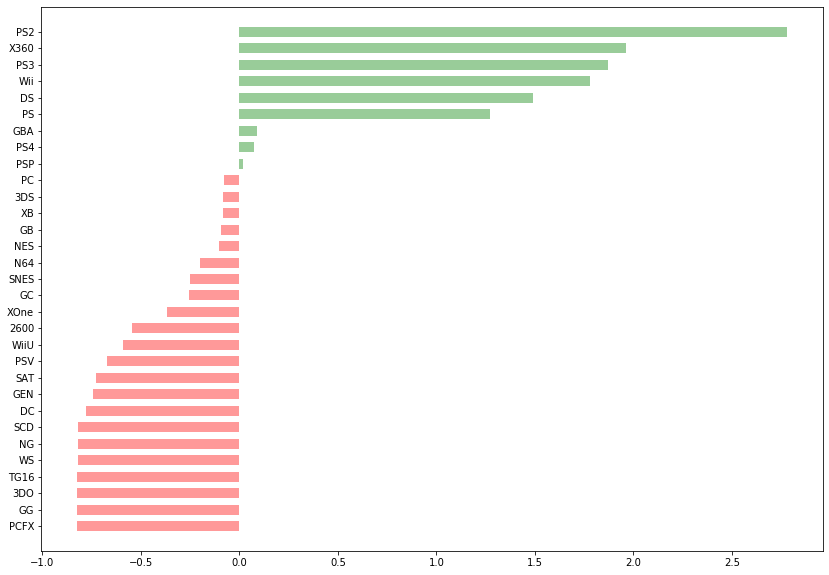

In [113]:
plt.figure(figsize=(14,10))
pl = plt.hlines(y=dfp.platform, xmax=dfp.sales_z, xmin=0, color=dfp.colors, alpha=0.4, linewidth=10)

plt.show()

In [66]:
df_tree=df[["platform", "total_sales"]].groupby("platform").sum().sort_values(by="total_sales").reset_index()
df_tree=df_tree[df_tree["total_sales"]!=0]
sizes=df_tree.total_sales.values
labels=df_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)

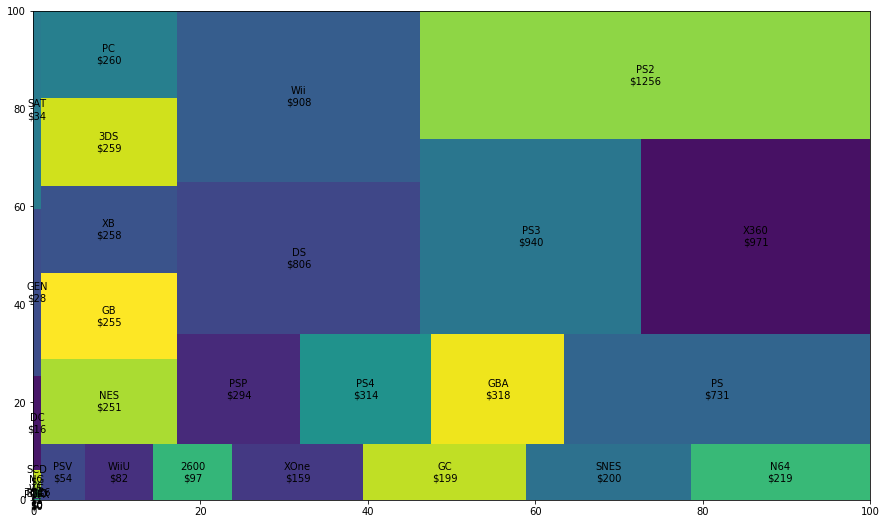

In [67]:
plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes, label = labels)
plt.show()

Considering all platforms of all times, the PS2, X360 and PS3 had the most sales. As we see in the 2 graphs above, there are also many platforms, which had very low sales, for example the PCFX, GG or 3DO.

### Shrinking and growing platforms

In [68]:
years_sales= df.pivot_table(index="year_of_release", values="total_sales", aggfunc="sum", columns="platform")
dynamics = years_sales-years_sales.shift(+1)
dynamics = dynamics.T
dynamics.tail()

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.95,2.22,35.65,-79.02,-68.30,-37.94,-13.12,-4.84,-2.61,-0.96
WiiU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.09,0.38,-5.68,-11.75
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.97,29.67,-14.97,49.74,-26.19,-44.10,-11.16,-53.84,-22.78,-10.44
XB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.32,-6.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XOne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.11,6.07,-33.99


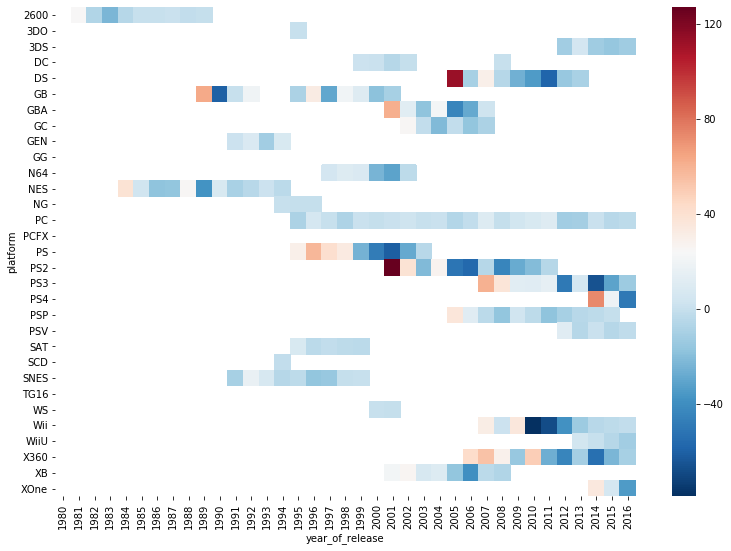

In [69]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics,cmap="RdBu_r")
plt.show()

In the graph above, we can see how long it takes for a new platform to disappear. It takes about 2-12 years. The PC is an exception because it is not a game console in the true sense and stands for a variety of evolving standalone PCs and laptops.
In the last years all platforms shrunk in their sales.

In the following steps, only the games released in 2010 and later will play a role, as the rest of the data are too old to paint a picture of today's user behavior.

In [70]:
df=df.loc[df["year_of_release"]>=2010]

### Plotting histograms for the total_sales

In [71]:
grouped = df.groupby(["platform", "year_of_release"])["total_sales"].sum().reset_index()

In [72]:
ordered = grouped.groupby(["platform"])["total_sales"].sum().sort_values().reset_index()["platform"]

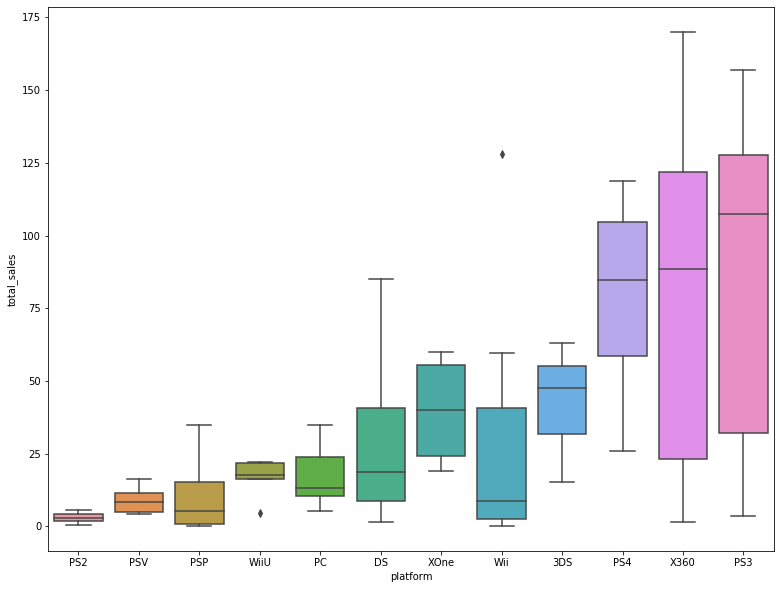

In [73]:
plt.figure(figsize=(13,10))
sns.boxplot(x="platform", y="total_sales", data = grouped, order = ordered)
plt.show()

In the graph above, the sum of all game sales for each console and year has been calculated and shown as a histogram. You can see that the total sales for games for the PS3 (-160 USD million), X360 (-170USD million) and PS4 consoles (-120 USD million) are the highest per year. X360 and PS3 game have a larger range in sales in different years than the PS4.

In [74]:
average_grouped = df.groupby(["year_of_release", "platform"])["total_sales"].mean().reset_index()

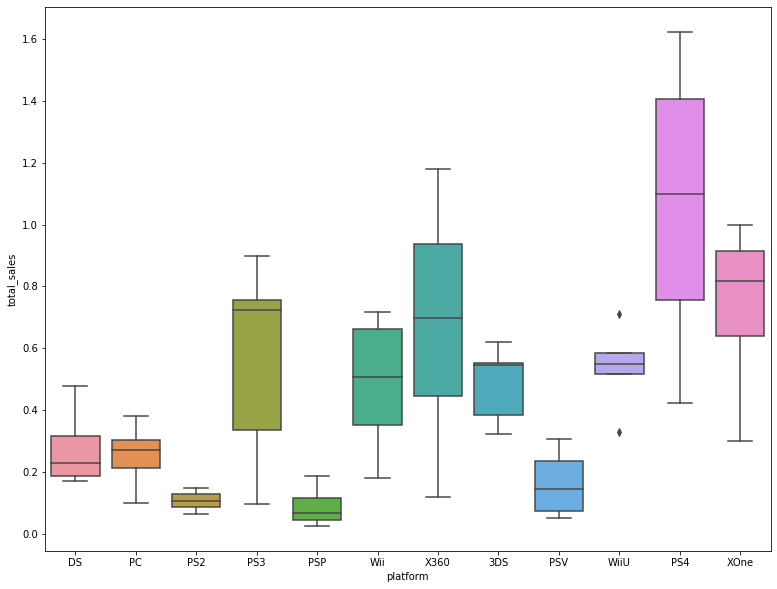

In [75]:
plt.figure(figsize=(13,10))
sns.boxplot(x="platform", y="total_sales", data = average_grouped)
plt.show()

Considering the average sales of games per year, PS4 (0.4 - 1.6 USD million) and XOne (0.3 - 1.0 USD million) excel, but for the PS4 the variety is very big, eventhough it's 25- quantile is still bigger than the median of most of the other platforms. What"s very interesting is, that the average sales per year are very static for the WiiU (~0.6 USD million).

### Dependency of reviews and sales

In the following, the DS is considered as a representative of all platforms in order to check whether there is a correlation between user_score / critic_score and total_sales.

In [76]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,unknown,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


In [77]:
data_ds = df[df["platform"]=="DS"]

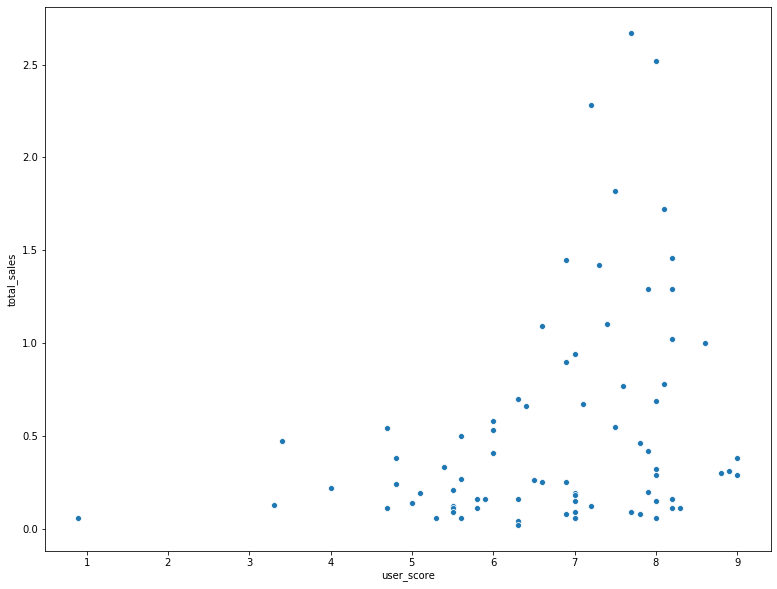

In [78]:
plt.figure(figsize=(13,10))
sns.scatterplot(data=data_ds, x="user_score", y="total_sales", palette="winter_r")
plt.show()

<Figure size 936x720 with 0 Axes>

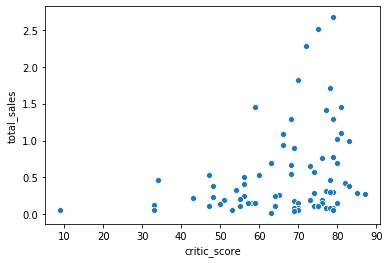

In [79]:
plt.figure(figsize=(13,10))
#sns.boxplot(x="platform", y="total_sales", data = grouped, order = ordered)
plt.show()

sns.scatterplot(data=data_ds, x="critic_score", y="total_sales", palette="winter_r")

In [80]:
data_ds[["user_score", "critic_score", "total_sales"]].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.881645,0.317735
critic_score,0.881645,1.000000,0.290803
total_sales,0.317735,0.290803,1.000000


In the 2 charts and the table above we can see that there is a small correlation between rating and total sales. The correlation index user_score - total_sales is about 0.32 and the correlation index critic_score - total_sales is about 0.29. In both cases, the correlation is relatively small.

In [81]:
data_ds

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,unknown,15.13
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,unknown,8.06
565,Mario vs. Donkey Kong: Mini-Land Mayhem!,DS,2010,Puzzle,1.63,0.51,0.35,0.18,79.0,7.7,E,2.67
611,Art Academy,DS,2010,Misc,0.26,1.65,0.33,0.28,75.0,8.0,E,2.52
700,LEGO Harry Potter: Years 1-4,DS,2010,Action,1.07,0.99,0.00,0.22,72.0,7.2,E10+,2.28
...,...,...,...,...,...,...,...,...,...,...,...,...
16414,Gakuen Hetalia,DS,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16494,thinkSMART: Chess for Kids,DS,2011,Misc,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16579,Ishin no Arashi: Shippuu Ryuumeden,DS,2010,Strategy,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16580,Dengeki Gakuen RPG: Cross of Venus Special,DS,2011,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


### Comparison of the sales of the same games on other platforms

So far, only the total sales of the platforms have been taken into account. In this point, the data set is filtered so that only games that have been released on at least 7 platforms remain. In this way, it should be determined which console performs best in the sale of the same games.
This works as follows:

1. Filtering the dataset so that only games released on multiple consoles are considered (multi_games).

2. Determine the average sales of each game (sum of all games sold / number of platforms on which the game was released). For this purpose the function "calculate_average_sales" is defined.

3. Creation of the column "platform_factor", which is calculated from the revenues of a game on a certain console divided by the average revenues of the game. The "get_platform_factor" function is defined for this purpose. For each console, the average of all platform_factor values from the sales of all games is calculated and used for comparison with other platforms.

4. Creation of a comparative diagram.


In [82]:
#### Filtering the dataset 

In [83]:
df2 = df.name.value_counts()
n=7

multi_games = df2[df2>=n]
multi_games

LEGO Marvel Super Heroes                         9
FIFA 14                                          9
Lego Batman 3: Beyond Gotham                     8
The LEGO Movie Videogame                         8
FIFA Soccer 13                                   8
LEGO The Hobbit                                  8
FIFA 15                                          8
LEGO Jurassic World                              8
Angry Birds Star Wars                            8
Terraria                                         8
Major League Baseball 2K11                       7
LEGO Star Wars III: The Clone Wars               7
LEGO The Lord of the Rings                       7
Skylanders: SuperChargers                        7
Pro Evolution Soccer 2012                        7
LEGO Batman 2: DC Super Heroes                   7
LEGO Pirates of the Caribbean: The Video Game    7
FIFA 12                                          7
Skylanders SWAP Force                            7
LEGO Marvel's Avengers         

#### Determine the average sales of each game

In [114]:
df_slice=df.copy()[df.name.isin(multi_games.index)]
df_slice["average_sales"] = 1
len(df_slice)

180

<div class="alert alert-warning">

**Reviewer's comment:** As you can see `pandas` shows the Warning because you want to make changes to the copy of original dataframe which may result in changes in original dataframe. Sometimes we can ignore some warnings, but not in that case. To avoid this problem when you make a copy of the original dataframe use `copy_df = original_df.copy()`, no your new dataframe will not depend from the original one.
</div>

In [85]:
def calculate_average_sales(data):
    data_new = data
    row_new = []
    for name in multi_games.index:
        mean = df.loc[df.name==name].total_sales.mean()
        for index,row in df_slice.iterrows():
            data_new.loc[data_new["name"]==name, "average_sales"] = mean
         
    return data_new

In [86]:
test = calculate_average_sales(df_slice)
test

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,Average_sales
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17,1.996250
122,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,NaN,NaN,unknown,6.64,1.861429
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46,1.828889
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,2.171250
190,FIFA Soccer 13,X360,2012,Action,1.09,3.47,0.03,0.57,90.0,6.1,E,5.16,1.996250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,LEGO Jurassic World,PC,2015,Action,0.00,0.04,0.00,0.00,72.0,7.1,E10+,0.04,0.586250
14571,Terraria,WiiU,2016,Action,0.00,0.03,0.00,0.00,69.0,6.9,T,0.03,0.195000
14686,LEGO Pirates of the Caribbean: The Video Game,PC,2011,Action,0.03,0.00,0.00,0.00,73.0,6.6,E10+,0.03,0.771429
14792,Pro Evolution Soccer 2012,3DS,2011,Action,0.02,0.00,0.00,0.00,NaN,NaN,unknown,0.02,0.518571


#### Creation of the column "platform_factor"

In [87]:
def get_platform_comparison_factor(data):
    data["platform_factor"] = 0
    row_new = []
    for index,row in df_slice.iterrows():
        factor = row["total_sales"]/row["average_sales"]
        row["platform_factor"] = factor
        row_new.append(factor)
    data["platform_factor"] = row_new    
    return data            
      #  factor = data.total_sales/data.average

In [88]:
test = get_platform_comparison_factor(df_slice)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [89]:
test

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,Average_sales,platform_factor
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17,1.996250,4.092674
122,FIFA 12,PS3,2011,Sports,0.84,4.30,0.11,1.39,NaN,NaN,unknown,6.64,1.861429,3.567153
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46,1.828889,3.532199
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08,2.171250,2.800230
190,FIFA Soccer 13,X360,2012,Action,1.09,3.47,0.03,0.57,90.0,6.1,E,5.16,1.996250,2.584847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13941,LEGO Jurassic World,PC,2015,Action,0.00,0.04,0.00,0.00,72.0,7.1,E10+,0.04,0.586250,0.068230
14571,Terraria,WiiU,2016,Action,0.00,0.03,0.00,0.00,69.0,6.9,T,0.03,0.195000,0.153846
14686,LEGO Pirates of the Caribbean: The Video Game,PC,2011,Action,0.03,0.00,0.00,0.00,73.0,6.6,E10+,0.03,0.771429,0.038889
14792,Pro Evolution Soccer 2012,3DS,2011,Action,0.02,0.00,0.00,0.00,NaN,NaN,unknown,0.02,0.518571,0.038567


#### Creation of a comparative diagram.


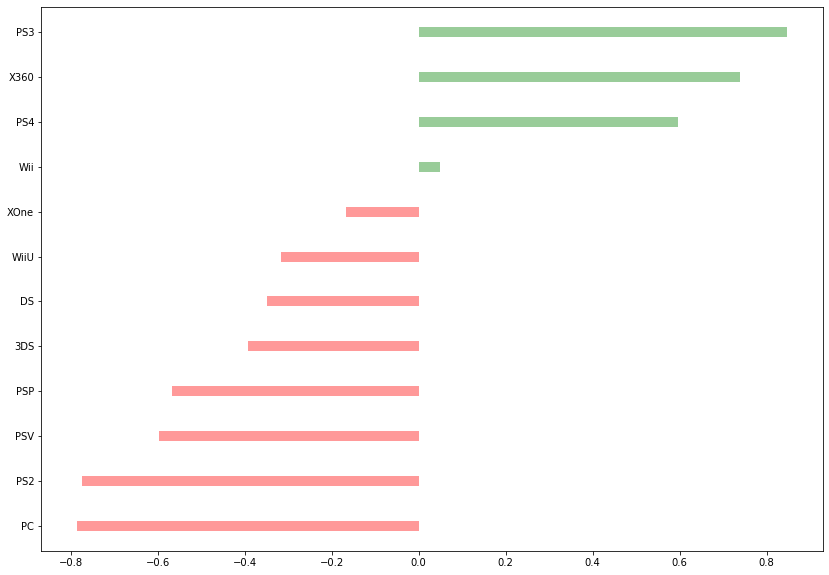

In [90]:
test_grouped = test[["platform", "platform_factor"]].groupby(["platform"]).mean().sort_values(by="platform_factor", ascending=True)
test_grouped["platform_factor_percentage"]= (test_grouped["platform_factor"]-1)
test_grouped["colors"]=["red" if x<0 else "green" for x in test_grouped["platform_factor_percentage"]]

plt.figure(figsize=(14,10))
plt.hlines(y=test_grouped.index, xmax=test_grouped.platform_factor_percentage, xmin=0, color=test_grouped.colors, alpha=0.4, linewidth=10)
plt.show()


#### Conclusion 

The graph above shows that the PS3, X360 and PS4 are the platform of choice when offering the same games. The PS3 has an 80% higher average platform_factor, the X360 has a 70% higher average platform_factor, and the PS4 has a 60% higher average platform_factor than the average.

### Comparison of the sales of different game genres

In the following, we will take a closer look at the genres. Similar to the last point, the average revenue is calculated for each genre and used for comparison.

In [92]:
genre = df[["genre", "total_sales"]].groupby(["genre"]).sum().sort_values(by="total_sales", ascending=True)

genre["Count"] = df[["genre", "total_sales"]].groupby(["genre"]).count()

genre["average_sales"] = genre["total_sales"] / genre["Count"]

genre

,total_sales,Count,average_sales
genre,,,
Puzzle,20.60,114,0.180702
Strategy,35.84,170,0.210824
Adventure,61.00,563,0.108348
Simulation,71.75,217,0.330645
Fighting,81.59,199,0.410000
Platform,119.72,153,0.782484
Racing,122.68,237,0.517637
Misc,234.56,576,0.407222
Role-Playing,315.28,568,0.555070


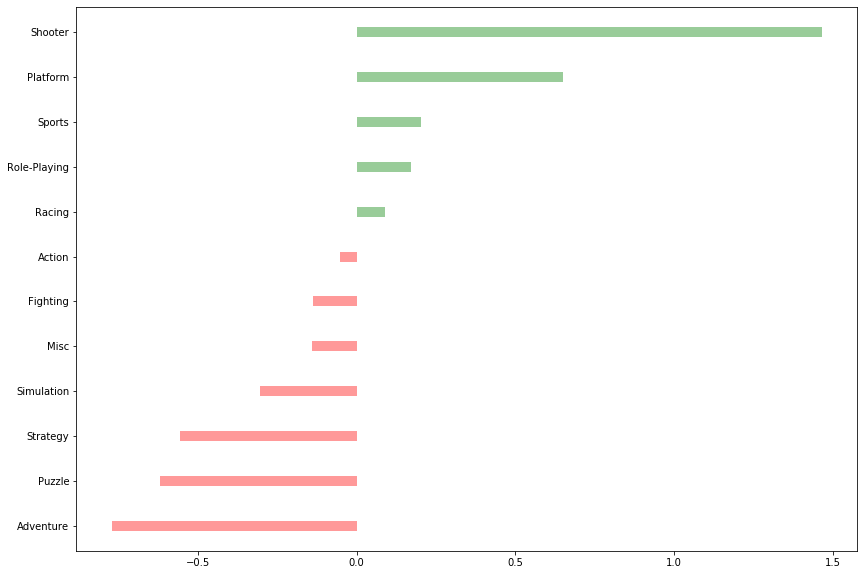

In [94]:
genre["average_difference"]= ((genre["average_sales"]-genre["average_sales"].mean()) / genre["average_sales"].mean())
genre["colors"]=["red" if x<0 else "green" for x in genre["average_difference"]]
genre = genre.sort_values("average_difference")

plt.figure(figsize=(14,10))
plt.hlines(y=genre.index, xmax=genre.average_difference, xmin=0, color=genre.colors, alpha=0.4, linewidth=10)
plt.show()

The graph above shows, that games with from the "Shooter"- genre are sold most. Shooter games sell 150% better than the avereage. Adventure games seem to be less attractive and sell 75% worse than the average.

<div class="alert alert-success">

**Reviewer's comment:** Well done, I like your informative graphs and analysis.
</div>

## Creating a user profile for each region

In the following, a user profile is created for each region, determining the most popular platform, the most popular genre and the dependency on the ESRB rating. For each of the regions considered (NA, EU and JP), a filtered dataset is used, containing only the games that have generated more than 0 USD in revenue in the respective region.

### NA

In [95]:
df_NA=df.loc[df["na_sales"]>0]

#### Top 5 platforms NA

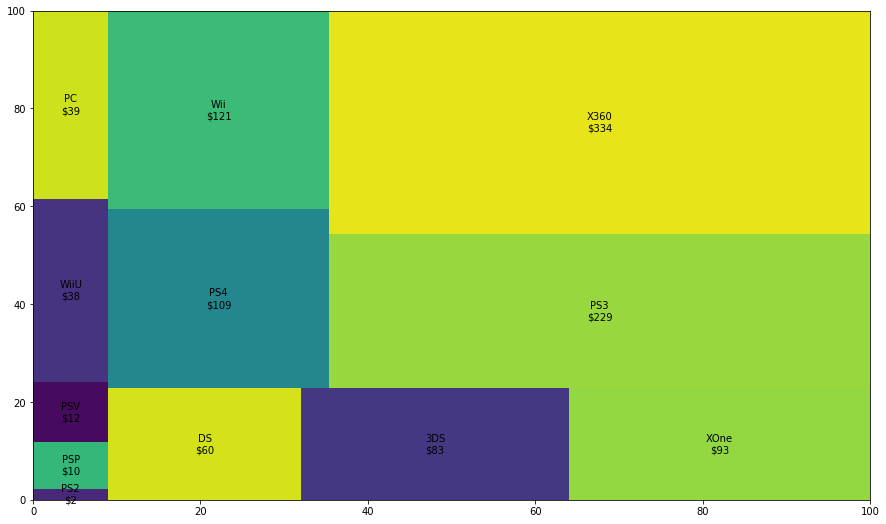

In [96]:
df_tree=df_NA[["platform", "na_sales"]].groupby("platform").sum().sort_values(by="na_sales").reset_index()
sizes=df_tree.na_sales.values
labels=df_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)
labels

plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes, label = labels)
plt.show()

The X360 has the highest sales in NA (334 million USD).

#### Top 5 genres NA

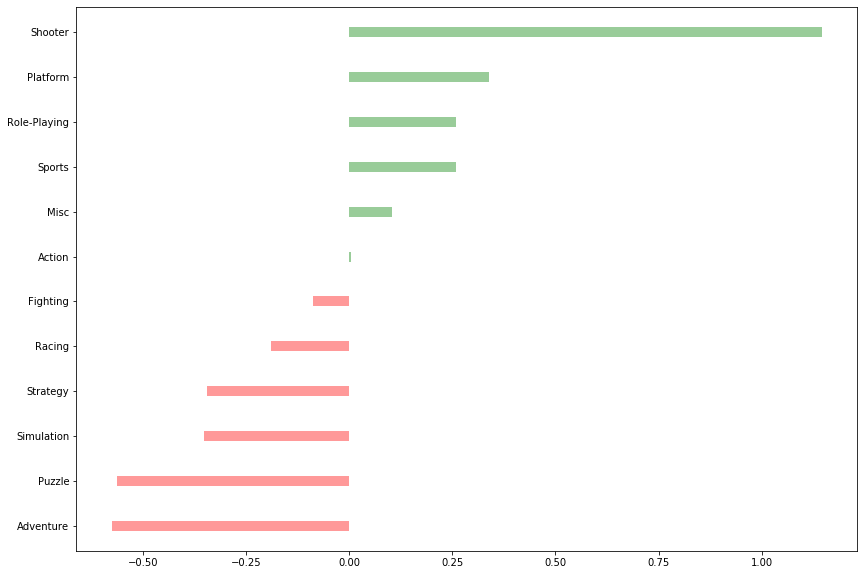

In [97]:
genre_NA = df_NA[["genre", "na_sales"]].groupby(["genre"]).sum().sort_values(by="na_sales", ascending=True)

genre_NA["Count"] = df_NA[["genre", "na_sales"]].groupby(["genre"]).count()

genre_NA["average_sales"] = genre_NA["na_sales"] / genre_NA["Count"]

genre_NA["average_difference"]= ((genre_NA["average_sales"]-genre_NA["average_sales"].mean()) / genre_NA["average_sales"].mean())
genre_NA["colors"]=["red" if x<0 else "green" for x in genre_NA["average_difference"]]
genre_NA = genre_NA.sort_values("average_difference")

plt.figure(figsize=(14,10))
plt.hlines(y=genre_NA.index, xmax=genre_NA.average_difference, xmin=0, color=genre_NA.colors, alpha=0.4, linewidth=10)
plt.show()

Games from the genre Shooter sell best in NA. Their sales are 110% higher than the average.

#### Dependency of ESRB ratings NA

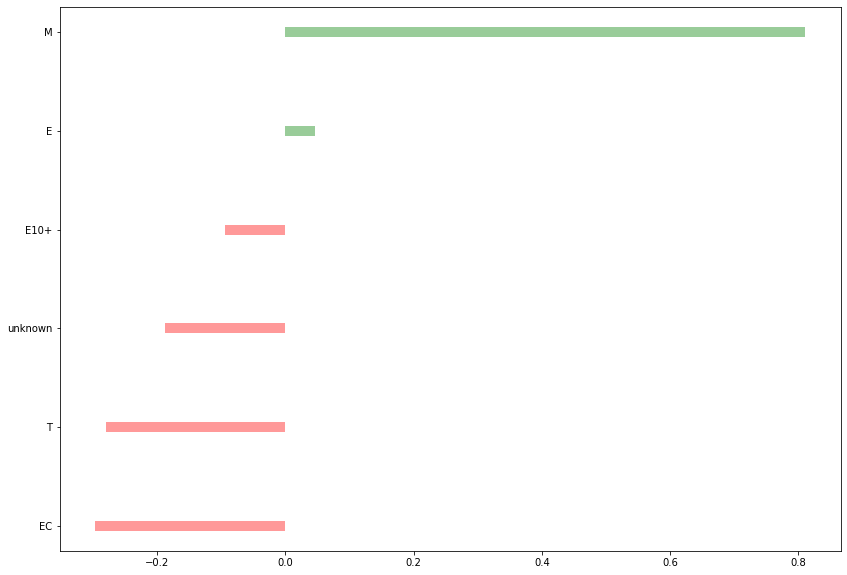

AttributeError: 'LineCollection' object has no attribute 'xlabel'

In [118]:
rating_NA = df_NA.loc[~df_NA["rating"].isna()][["rating", "na_sales"]].groupby(["rating"]).sum().sort_values(by="na_sales", ascending=True)

rating_NA["Count"] = df_NA[["rating", "na_sales"]].groupby(["rating"]).count()

rating_NA["average_sales"] = rating_NA["na_sales"] / rating_NA["Count"]

rating_NA["average_difference"]= ((rating_NA["average_sales"]-rating_NA["average_sales"].mean()) / rating_NA["average_sales"].mean())
rating_NA["colors"]=["red" if x<0 else "green" for x in rating_NA["average_difference"]]
rating_NA = rating_NA.sort_values("average_difference")

plt.figure(figsize=(14,10))
plt.hlines(y=rating_NA.index, xmax=rating_NA.average_difference, xmin=0, color=rating_NA.colors, alpha=0.4, linewidth=10)
plt.show()



In NA games with the ESRB- rating "M" (Mature) have 80% higher sales than the average.

### EU

In [99]:
df_EU=df.loc[df["eu_sales"]>0]

#### Top 5 platforms EU

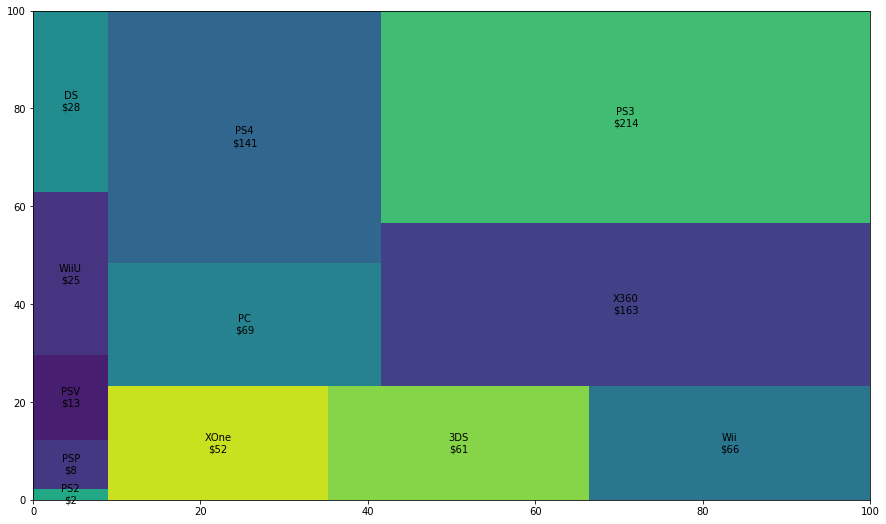

In [100]:
df_tree=df_EU[["platform", "eu_sales"]].groupby("platform").sum().sort_values(by="eu_sales").reset_index()
sizes=df_tree.eu_sales.values
labels=df_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)
labels

plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes, label = labels)
plt.show()

The PS3 has the highest sales in EU (214 million USD).

#### Top 5 genres

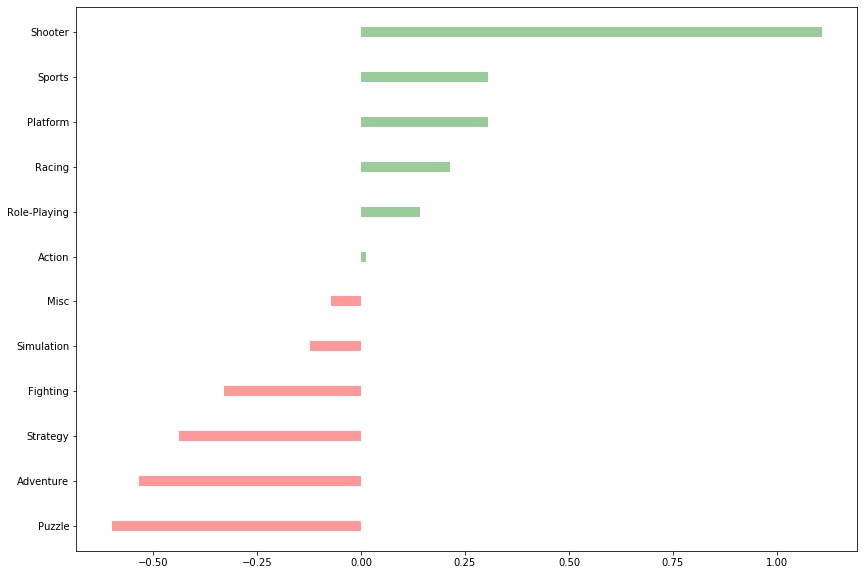

In [101]:
genre_EU = df_EU[["genre", "eu_sales"]].groupby(["genre"]).sum().sort_values(by="eu_sales", ascending=True)

genre_EU["Count"] = df_EU[["genre", "eu_sales"]].groupby(["genre"]).count()

genre_EU["average_sales"] = genre_EU["eu_sales"] / genre_EU["Count"]

genre_EU["average_difference"]= ((genre_EU["average_sales"]-genre_EU["average_sales"].mean()) / genre_EU["average_sales"].mean())
genre_EU["colors"]=["red" if x<0 else "green" for x in genre_EU["average_difference"]]
genre_EU = genre_EU.sort_values("average_difference")

plt.figure(figsize=(14,10))
plt.hlines(y=genre_EU.index, xmax=genre_EU.average_difference, xmin=0, color=genre_EU.colors, alpha=0.4, linewidth=10)
plt.show()

Games from the genre Shooter also sell best in EU. Their sales are also 110% higher than the average.

#### Dependency of ESRB ratings EU

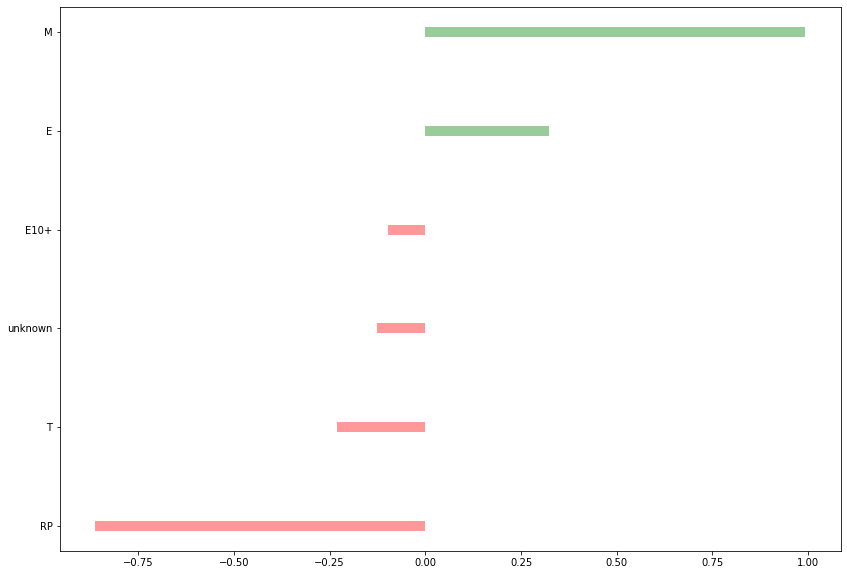

In [102]:
rating_EU = df_EU.loc[~df_EU["rating"].isna()][["rating", "eu_sales"]].groupby(["rating"]).sum().sort_values(by="eu_sales", ascending=True)

rating_EU["Count"] = df_EU[["rating", "eu_sales"]].groupby(["rating"]).count()

rating_EU["average_sales"] = rating_EU["eu_sales"] / rating_EU["Count"]

rating_EU["average_difference"]= ((rating_EU["average_sales"]-rating_EU["average_sales"].mean()) / rating_EU["average_sales"].mean())
rating_EU["colors"]=["red" if x<0 else "green" for x in rating_EU["average_difference"]]
rating_EU = rating_EU.sort_values("average_difference")

plt.figure(figsize=(14,10))
plt.hlines(y=rating_EU.index, xmax=rating_EU.average_difference, xmin=0, color=rating_EU.colors, alpha=0.4, linewidth=10)
plt.show()

In EU games with the ESRB- rating "M" (Mature) have 100% higher sales than the average.

### JP

In [103]:
df_JP=df.loc[df["jp_sales"]>0]

#### Top 5 platforms JP

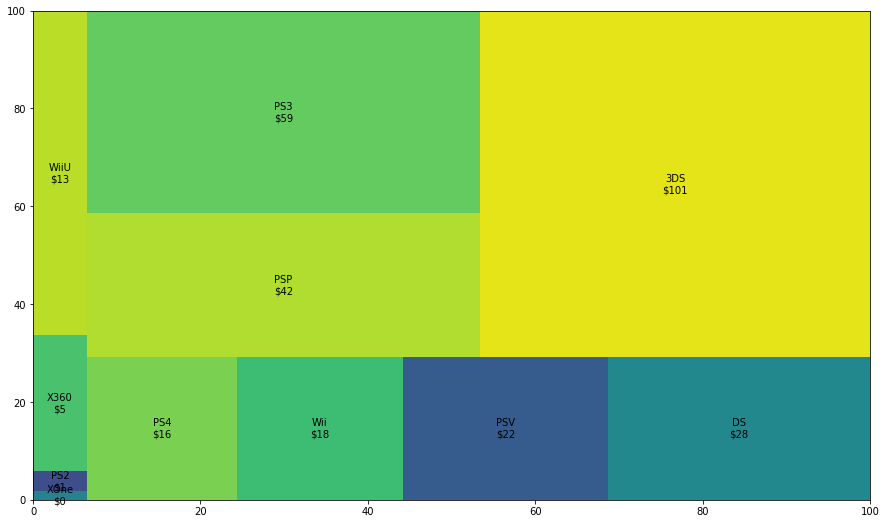

In [104]:
df_tree=df_JP[["platform", "jp_sales"]].groupby("platform").sum().sort_values(by="jp_sales").reset_index()
sizes=df_tree.jp_sales.values
labels=df_tree.apply(lambda x: str(x[0])+"\n"+"$"+str(round(x[1])),axis=1)
labels

plt.figure(figsize=(15,9))
squarify.plot(sizes=sizes, label = labels)
plt.show()

The DS has the highest sales in JP (101 million USD).

#### Top 5 genres JP

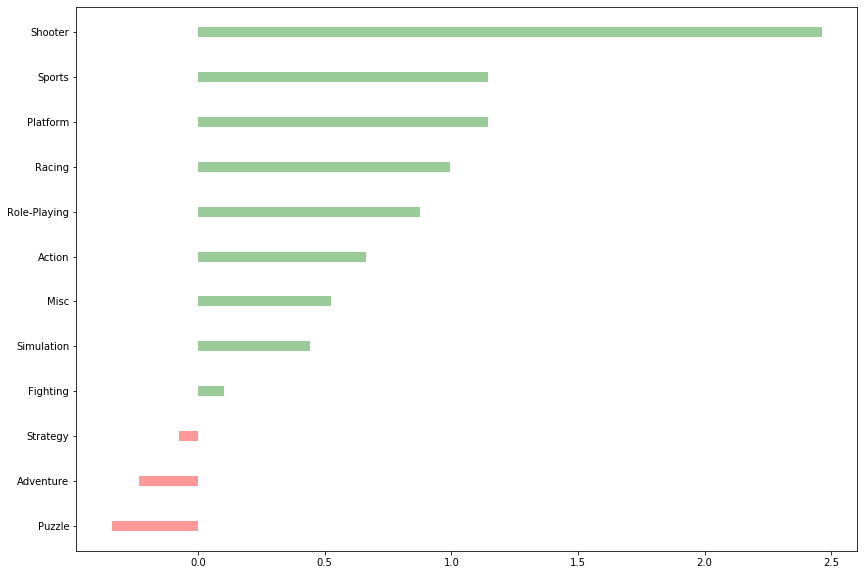

In [105]:
genre_JP = df_JP[["genre", "jp_sales"]].groupby(["genre"]).sum().sort_values(by="jp_sales", ascending=True)

genre_JP["Count"] = df_JP[["genre", "jp_sales"]].groupby(["genre"]).count()

genre_JP["average_sales"] = genre_JP["jp_sales"] / genre_JP["Count"]

genre_JP["average_difference"]= ((genre_EU["average_sales"]-genre_JP["average_sales"].mean()) / genre_JP["average_sales"].mean())
genre_JP["colors"]=["red" if x<0 else "green" for x in genre_JP["average_difference"]]
genre_JP = genre_JP.sort_values("average_difference")

plt.figure(figsize=(14,10))
plt.hlines(y=genre_JP.index, xmax=genre_JP.average_difference, xmin=0, color=genre_JP.colors, alpha=0.4, linewidth=10)
plt.show()

Also in JP Shooter- games have the highest sales. They sell 250% better than the average.

#### Dependency of ESRB ratings JP

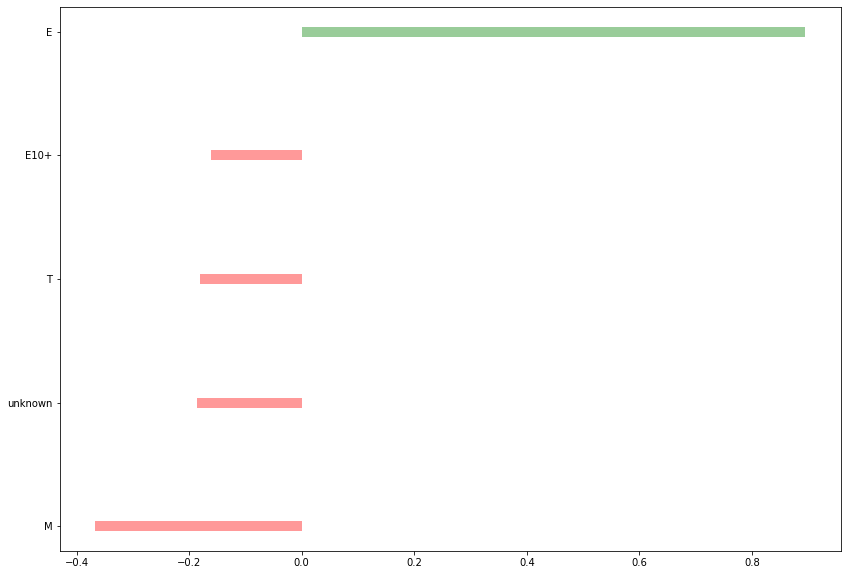

In [106]:
rating_JP = df_JP.loc[~df_JP["rating"].isna()][["rating", "jp_sales"]].groupby(["rating"]).sum().sort_values(by="jp_sales", ascending=True)

rating_JP["Count"] = df_JP[["rating", "jp_sales"]].groupby(["rating"]).count()

rating_JP["average_sales"] = rating_JP["jp_sales"] / rating_JP["Count"]

rating_JP["average_difference"]= ((rating_JP["average_sales"]-rating_JP["average_sales"].mean()) / rating_JP["average_sales"].mean())
rating_JP["colors"]=["red" if x<0 else "green" for x in rating_JP["average_difference"]]
rating_JP = rating_JP.sort_values("average_difference")

plt.figure(figsize=(14,10))
plt.hlines(y=rating_JP.index, xmax=rating_JP.average_difference, xmin=0, color=rating_JP.colors, alpha=0.4, linewidth=10)
plt.show()

In JP games with the ESRB- rating "E" (Evryone) have 90% higher sales than the average.

### Conclusion

In summary, shooter games are the most popular in all 3 regions. In terms of consoles, each region has its own favorite: In NA it is the X360, in EU it is the PS3 and in JP it is the DS. In NA and EU, games with an ESRB rating of "M" are the most popular, and in Japan, games with an ESRB rating of "E" are the most popular.

<div class="alert alert-success">

**Reviewer's comment:** You did it right 👍
</div>

## Testing of null-hypotheses

### Nullhypothesis: average user ratings of the Xbox One and PC platforms are the same

We have 2 statistical populations in this study: These are ratings of XBox One- games and ratings of PC- games. We want to test if the average ratings of the 2 platforms differ. Therefore we do the Equality of means hypothesis test.

The Null Hypothesis is: average user ratings of the Xbox One and PC platforms are the same.

The Alternative Hypothesis is: average user ratings of the Xbox One and PC platforms differ.

In [107]:
XBox_ratingU = df.loc[~df["user_score"].isna()].loc[df["platform"]=="XOne"]["user_score"]
PC_ratingU = df.loc[~df["user_score"].isna()].loc[df["platform"]=="PC"]["user_score"]

XBox_ratingU_average = XBox_ratingU.mean().round(2)
PC_ratingU_average = PC_ratingU.mean().round(2)

print("User rating average - XBox One : {}".format(XBox_ratingU_average))
print("User rating average - PC: {}".format(PC_ratingU_average))

User rating average - XBox One : 6.51
User rating average - PC: 6.52


In [108]:
results = st.ttest_ind(XBox_ratingU, PC_ratingU)

alpha = .05

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  0.9426234697304985
We can't reject the null hypothesis


In this study, the p- value is very high and shows that it is significant that the game ratings of the 2 platforms are the same. In our data set the average rating of XBox One- games is 6.51 and the average rating of PC- games is 6.52.

### Nullhypothesis: average user ratings for the Action and Sports genres are the same

We have 2 statistical populations in this study: These are ratings of Action- games and ratings of Sports- games. We want to test if the average ratings of the 2 game- genres differ. Therefore we also do the Equality of means hypothesis test.

The Null Hypothesis is: average user ratings for the Action and Sports genres are the same.

The Alternative Hypothesis is: average user ratings for the Action and Sports genres differ.

In [109]:
df.genre.value_counts()

Action          1495
Misc             576
Sports           575
Role-Playing     568
Adventure        563
Shooter          410
Racing           237
Simulation       217
Fighting         199
Strategy         170
Platform         153
Puzzle           114
Name: genre, dtype: int64

In [110]:
action_ratingU = df.loc[~df["user_score"].isna()].loc[df["genre"]=="Action"]["user_score"]
sports_ratingU = df.loc[~df["user_score"].isna()].loc[df["genre"]=="Sports"]["user_score"]

action_ratingU_average = action_ratingU.mean().round(2)
sports_ratingU_average = sports_ratingU.mean().round(2)

print("User rating average - Action : {}".format(action_ratingU_average))
print("User rating average - Sports: {}".format(sports_ratingU_average))

User rating average - Action : 6.72
User rating average - Sports: 5.86


In [111]:
results = st.ttest_ind(action_ratingU, sports_ratingU)

alpha = .05

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

p-value:  2.8567683685832565e-19
We reject the null hypothesis


In this study, the p- value is very low and shows that it is significant that the game ratings of the 2 genres are not the same. In our data set the average rating of action- games is 6.72 and the average rating of sports- games is 5.86.

<div class="alert alert-success">

**Reviewer's comment:** It's clear that you know how to use all needed tools for this task.
</div>

## General Conclusion

The results of the study of the data set can be summarized as follows:
Video game sales have had their ups and downs. By 2008 or so, total sales increased to about 1466 million USD and decreased to 502 million USD by 2017. Throughout that time, the PS2, X360, and PS3 platforms remain the record holders with total sales of 1256 USD, 971 USD, and 940 USD, respectively. Over the last decade, the PS3, X30 and PS4 consoles have been the most successful platforms.
Surprisingly, the correlation of professional and user ratings with game sales was relatively weak (0.27-0.32), although it should be noted again that very many values of the User_rating and Critic_rating columns are missing and the results are not very meaningful in this regard.
If we look at the sales of the platforms for the same games, we see that PS3, X360 and PS4 also perform particularly well. So when comparing the platforms, these are particularly successful.
The 3 best genres are, in order, Shooter, platform and Sports.
Everything mentioned so far applies to the regions NA, EU and JP combined. If you look at the regions individually, certain differences become apparent. The shooter genre is the most popular in all 3 regions, although this is especially true for Japan. In NA and Eu, games with an ESRB rating of "M" are the most successful, and in Japan, games with an ESRB rating of "E". In terms of platforms, each region has its own favorite. In NA it is the X360, in EU the PS3 and in JP the DS. It is interesting that in NA and EU a home console and in JP a mobile console is the most popular plaform.
Furthermore, 2 null hypotheses were investigated. Firstly, it was found that the ratings of PC and XBox One games are the same and secondly, that the popularity of action and sports games differs.

<div class="alert alert-success">

**Reviewer's comment:** Agree with you conclusion 👏 
</div>